In [2]:
import sys
import os
import numpy as np
import cortex
import matplotlib.pyplot as plt
import pickle
#from nilearn.plotting import view_img
import nibabel as nib
import subprocess as sp
import shlex


In [3]:

test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time_exp/aot/analysis/glmsingle/outputs/mainexp/sub-002_ses-01_voxel/TYPED_FITHRF_GLMDENOISE_RR.npy'
#test_data_path = '/tank/shared/2022/arrow_of_time/arrow_of_time_exp/aot/analysis/glmsingle/outputs/mainexp/sub-002_ses-01_voxel/TYPEC_FITHRF_GLMDENOISE.npy'
fs_dir = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sourcedata/freesurfer'      


test_data = np.load(test_data_path, allow_pickle=True).item()
#print(test_data)


for key in test_data:
    print(key)
#R2 = test_data['onoffR2']
R2 = test_data['R2']
##meanvol = test_data['meanvol']
#noisepool = test_data['noisepool']
#HRFindex = test_data['HRFindex']
fracvalue = test_data['FRACvalue']
# print(test_data['meanvol'])
#print(test_data['noisepool'].shape)
#print(test_data['R2'].shape)
#print(noisepool)

betas = test_data['betasmd']
print(betas.shape)
# #switch the first and second dimension
# betas = np.swapaxes(betas,0,1)

#betamean = np.mean(betas,axis=3)
#print(betamean.shape)





FileNotFoundError: [Errno 2] No such file or directory: '/tank/shared/2022/arrow_of_time/arrow_of_time_exp/aot/analysis/glmsingle/outputs/mainexp/sub-002_ses-01_voxel/TYPED_FITHRF_GLMDENOISE_RR.npy'

/tank/zhangs/anaconda3/lib/python3.9/site-packages/nilearn/_utils/niimg.py:62: UserWarning: Non-finite values detected. These values will be replaced with zeros.
  warn(
/tank/zhangs/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:755: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



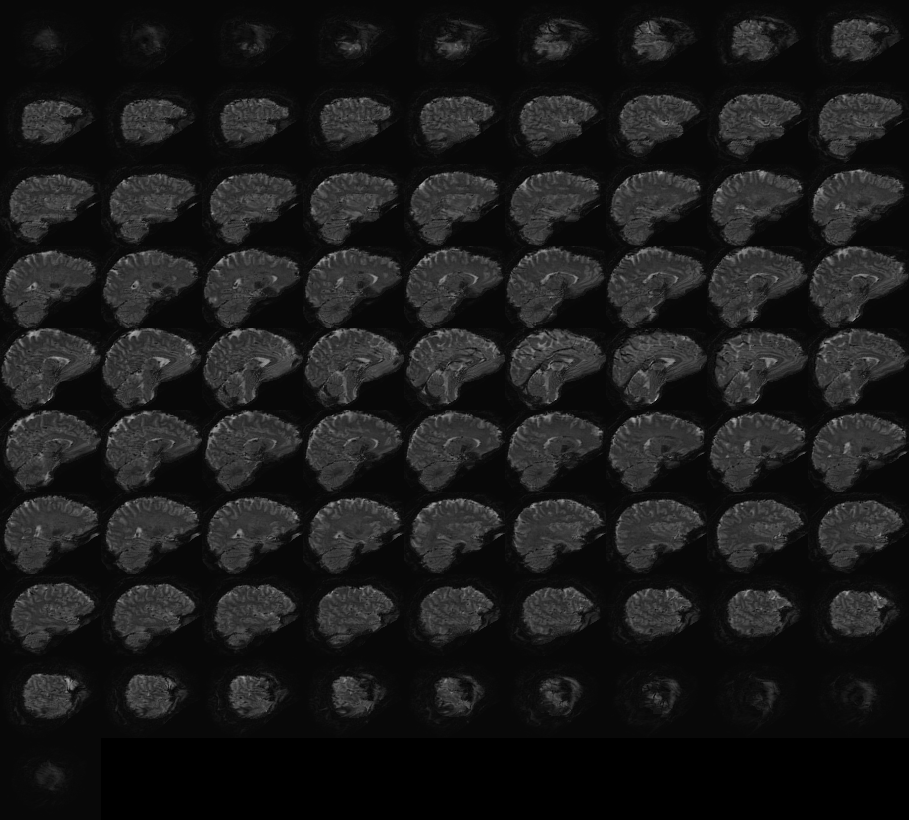
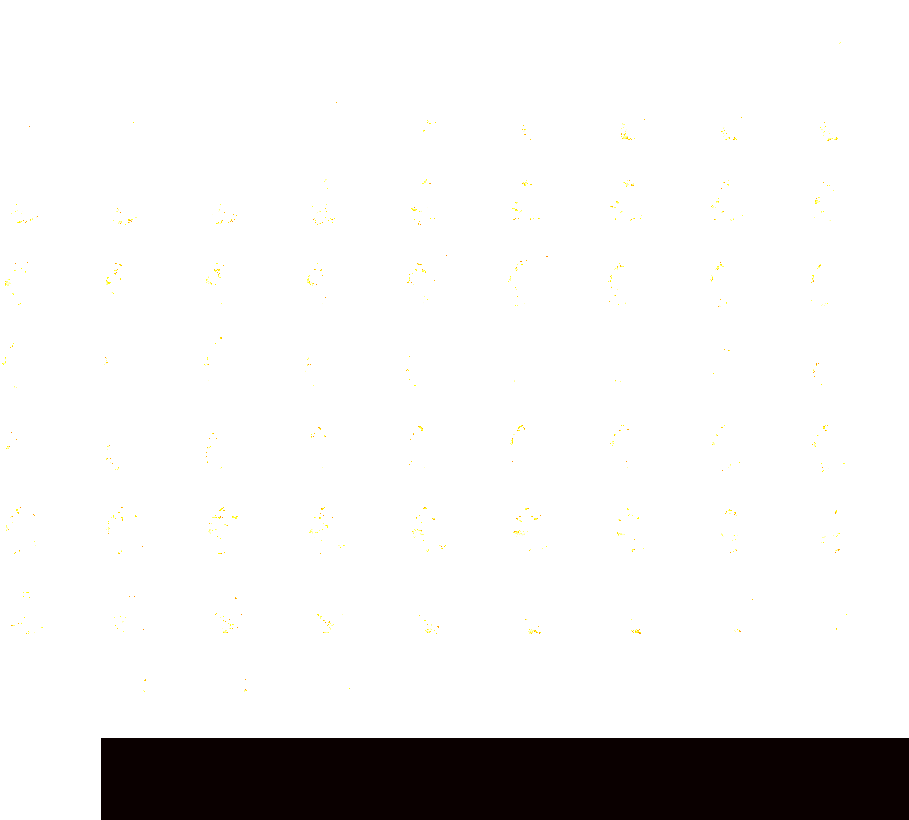

In [ ]:
orig_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz'
bg_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz'
bm_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz'

bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
R2_masked = np.zeros_like(R2)
R2_masked[bmask] = R2[bmask]
#betamean_masked = np.zeros_like(betamean)
#betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
R2_img = nib.Nifti1Image(R2_masked, affine=orig_image.affine, header=orig_image.header)
#betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(R2_img, threshold=40, vmax=70, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)

(82, 101, 82, 720)


/tank/zhangs/anaconda3/lib/python3.9/site-packages/nilearn/plotting/js_plotting_utils.py:76: UserWarning: you have specified symmetric_cmap=False but the map contains negative values; setting symmetric_cmap to True
  warnings.warn('you have specified symmetric_cmap=False '



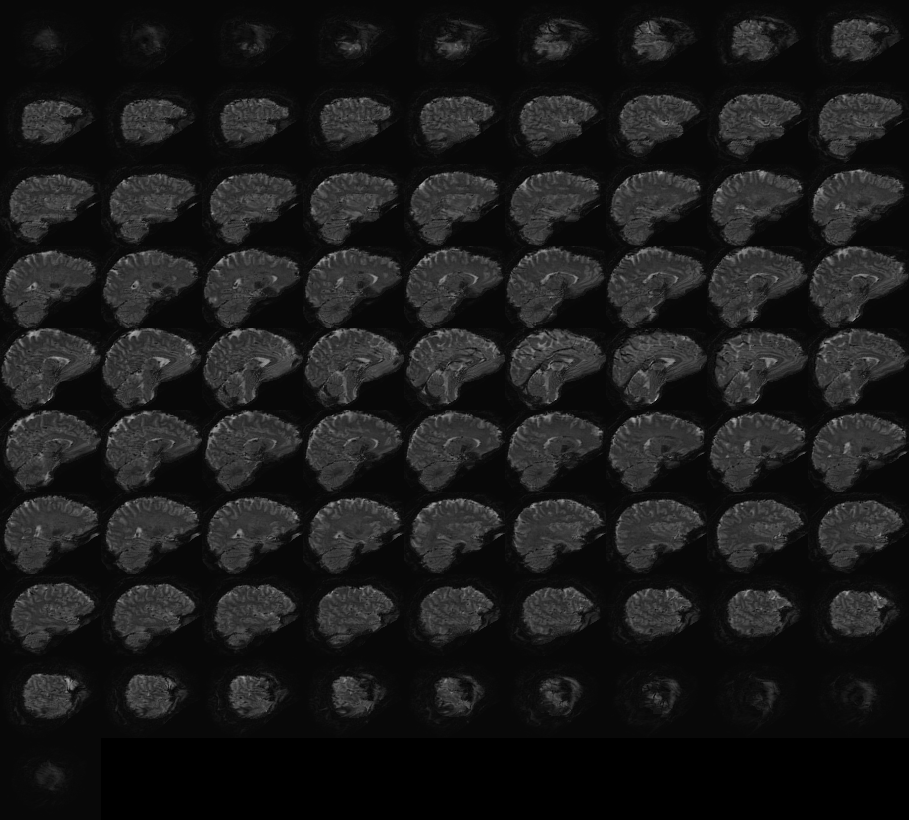
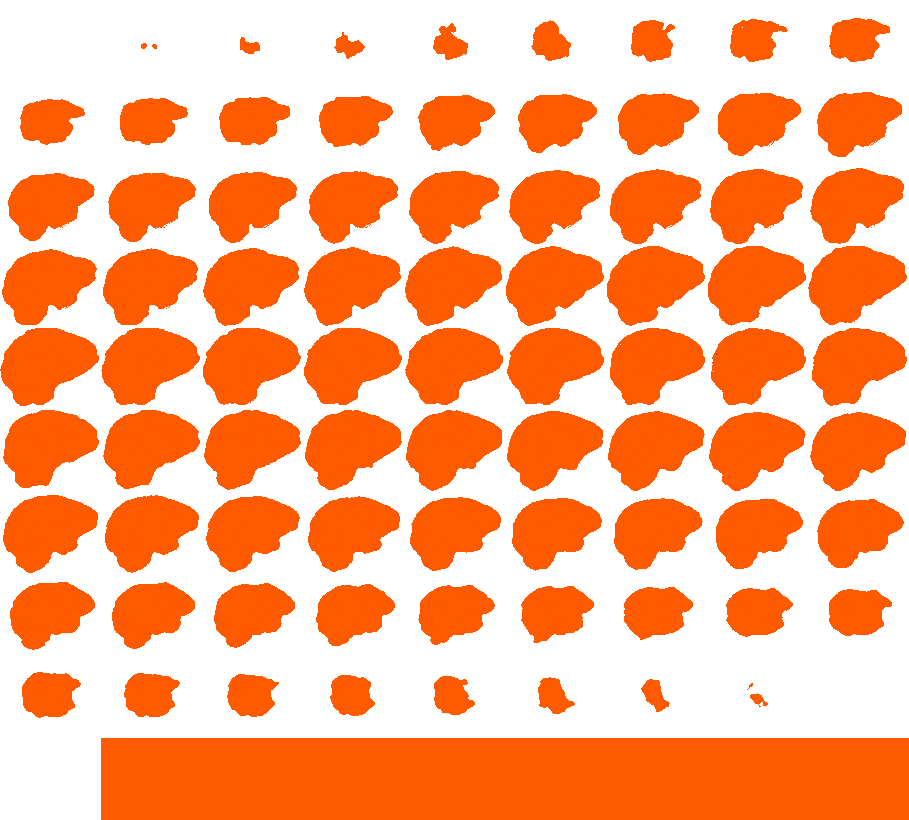

In [ ]:
betas = test_data['betasmd']
print(betas.shape)
betamean = np.mean(betas,axis=3)

orig_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz'
bg_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz'
bm_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz'

bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
betamean_masked = np.zeros_like(betamean)
betamean_masked[bmask] = betamean[bmask]
#betamean_masked = np.zeros_like(betamean)
#betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)
#betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(betamean_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)

In [ ]:
fracvalue = test_data['FRACvalue'] 
print(fracvalue.shape) 


orig_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-preproc_bold.nii.gz'
bg_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_boldref.nii.gz'
bm_image_fn = '/tank/shared/2022/arrow_of_time/derivatives/fmripreps/aotfull_preprocs/fullpreproc03/sub-002/ses-01/func/sub-002_ses-01_task-AOT_run-1_space-T1w_desc-brain_mask.nii.gz'

#bmask = nib.load(bm_image_fn).get_fdata().astype(bool)
#frac_masked = np.zeros_like(fracvalue)
#frac_masked[bmask] = frac_masked[bmask]
#betamean_masked = np.zeros_like(betamean)
#betamean_masked[bmask] = betamean[bmask]


orig_image = nib.load(orig_image_fn)
frac_img = nib.Nifti1Image(fracvalue, affine=orig_image.affine, header=orig_image.header)
#betamean_img = nib.Nifti1Image(betamean_masked, affine=orig_image.affine, header=orig_image.header)

view_img(frac_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(R2_img, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)
#view_img(betamean_img, threshold=0.5, vmax=1, cmap='hot', symmetric_cmap=False, bg_img=bg_image_fn)

(679124,)


IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed